<a href="https://colab.research.google.com/github/lekshmi29-lx/DSA_workB7/blob/main/Classification_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine_data = pd.read_csv("/content/winequality-red.csv")

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_data.nunique()

,0
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [ ]:
wine_data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**EDA**

In [ ]:
num_cols = wine_data.select_dtypes(include='float64')

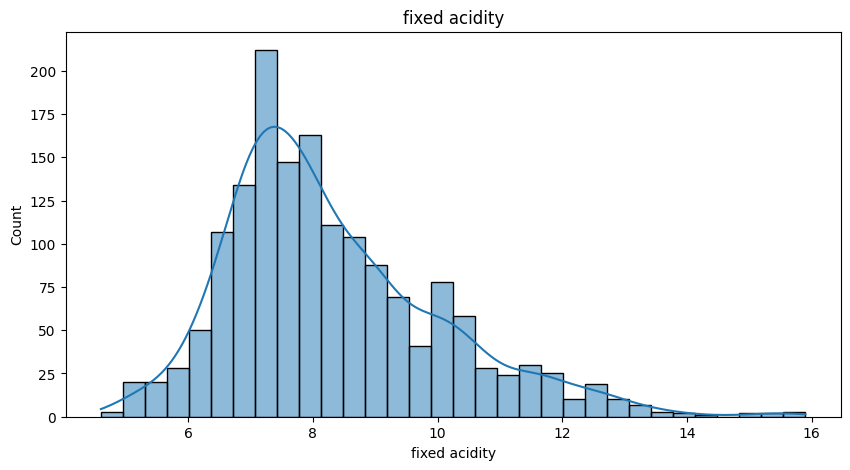

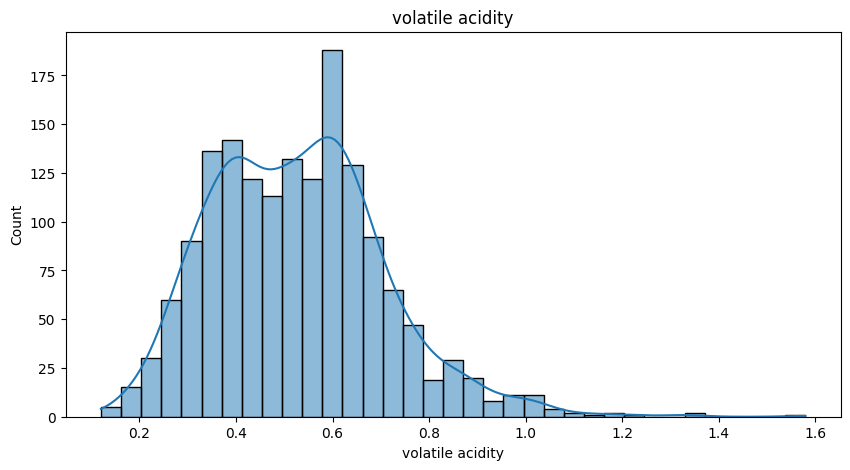

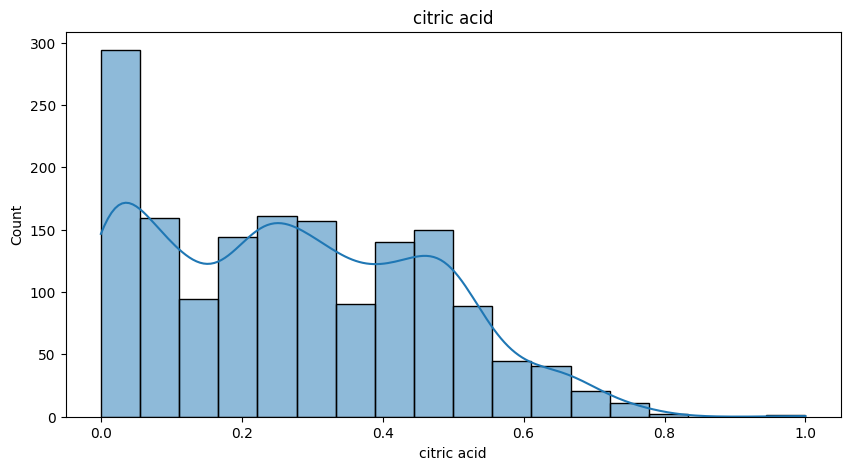

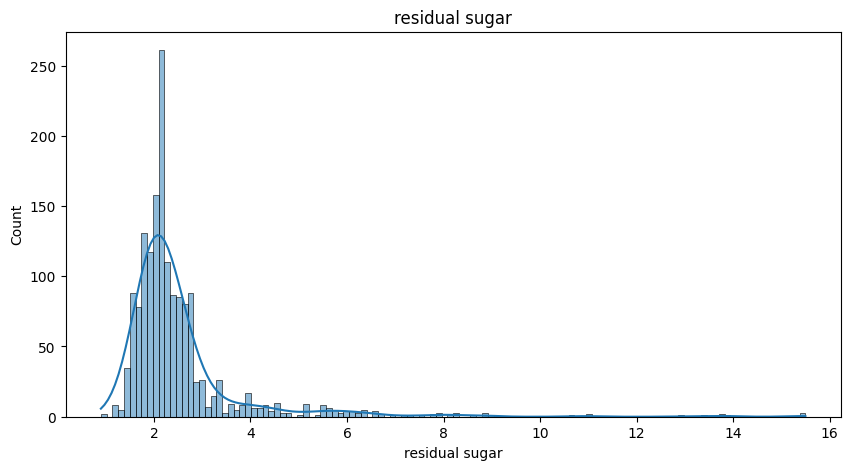

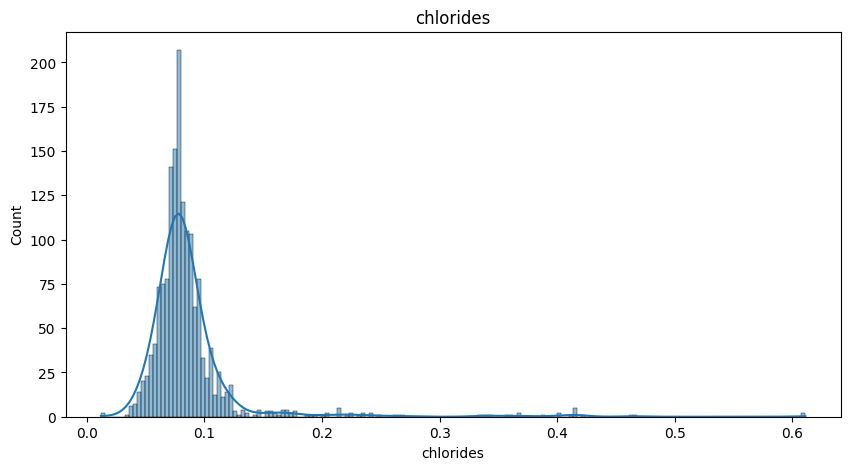

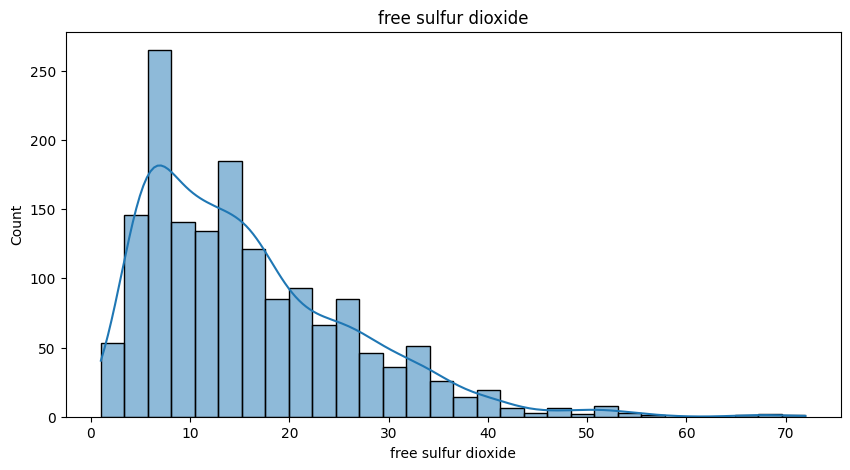

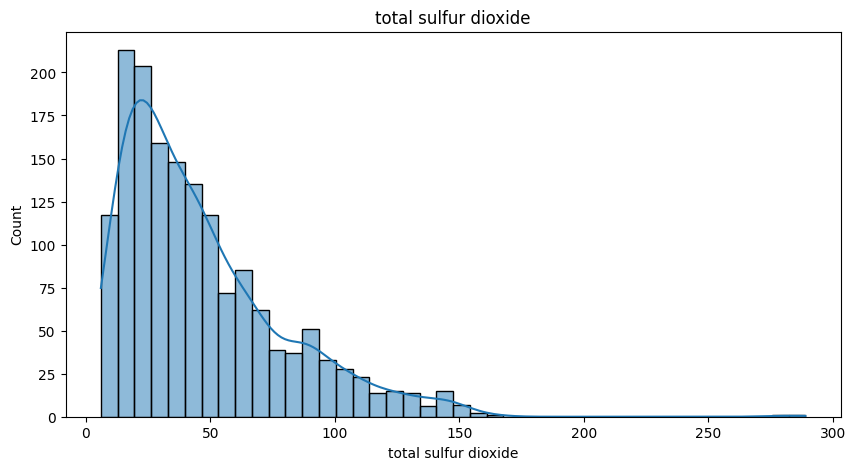

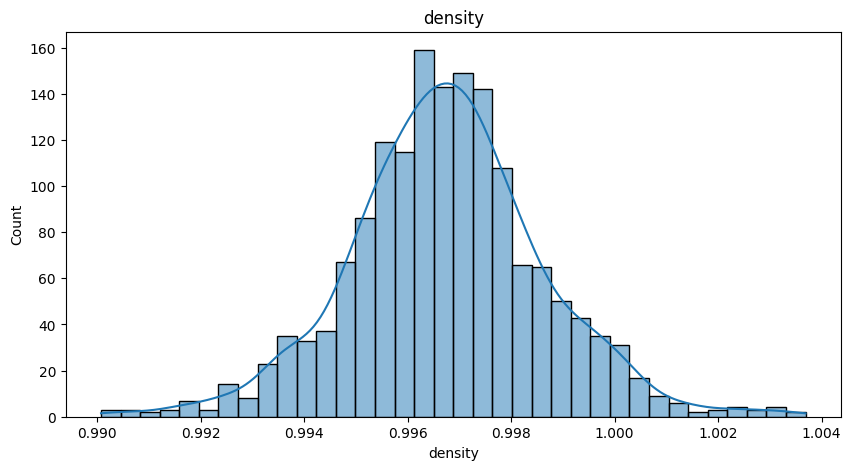

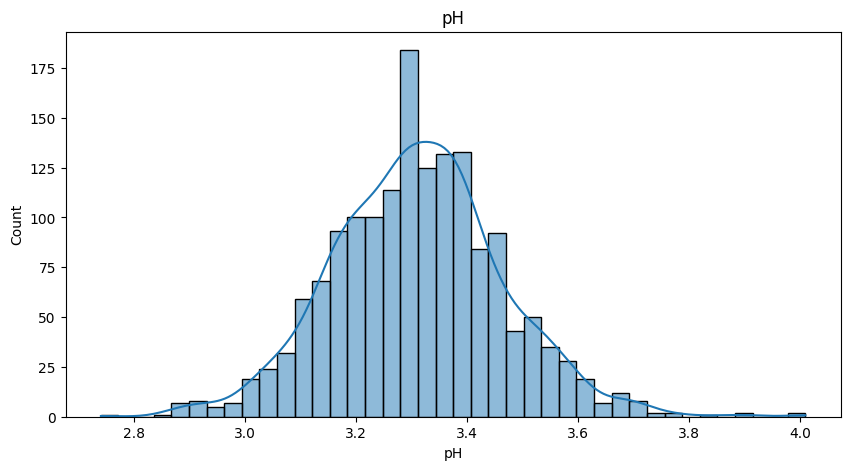

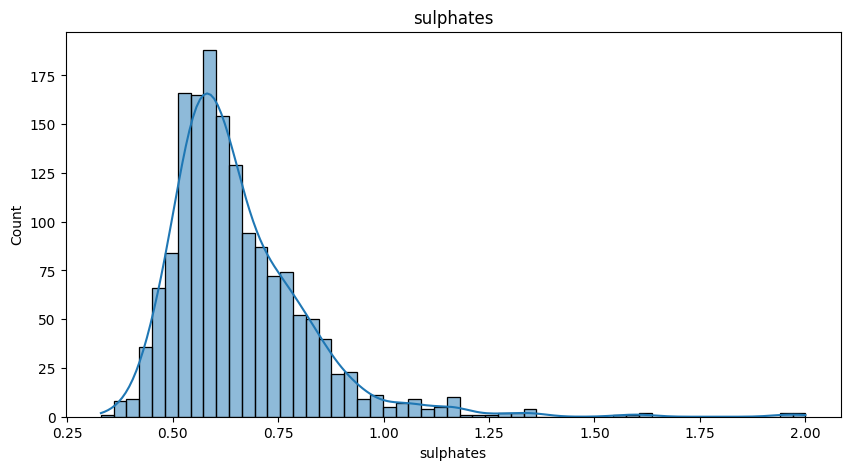

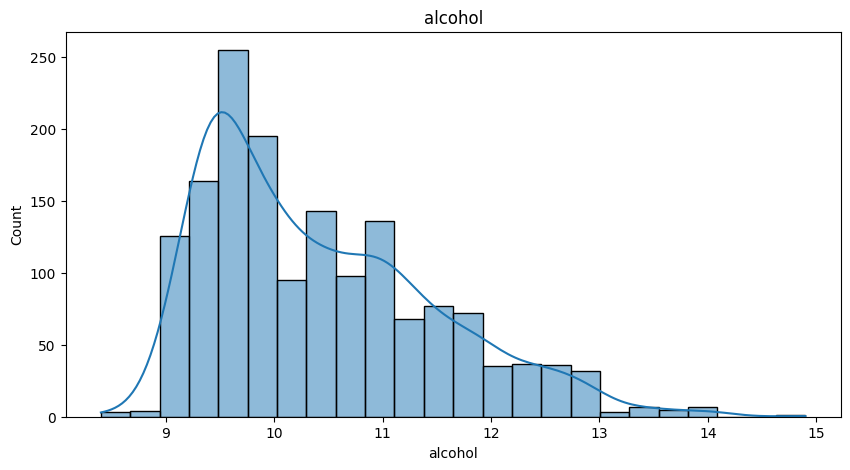

In [ ]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.histplot(data = wine_data,x=i,kde=True)
  plt.title(i)

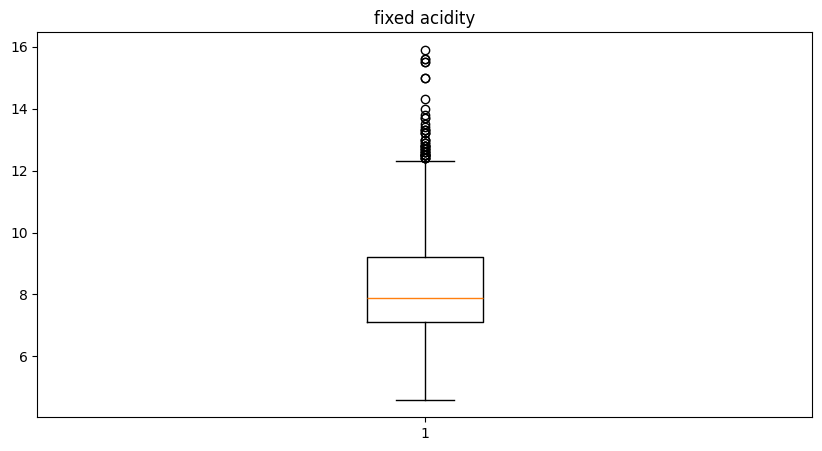

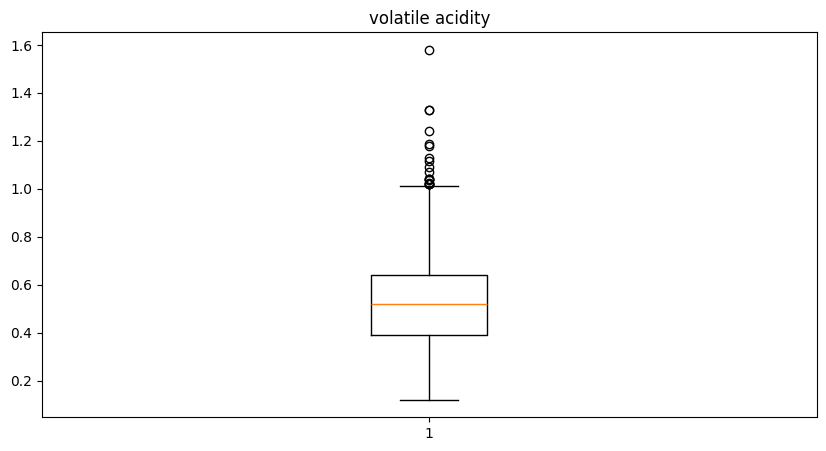

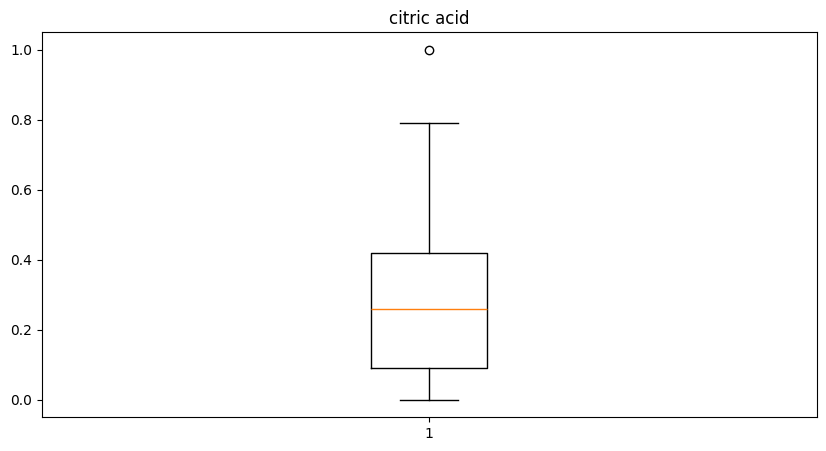

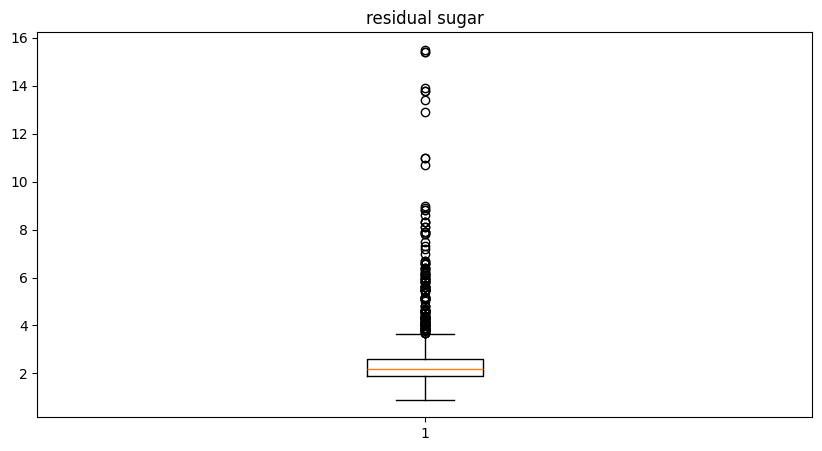

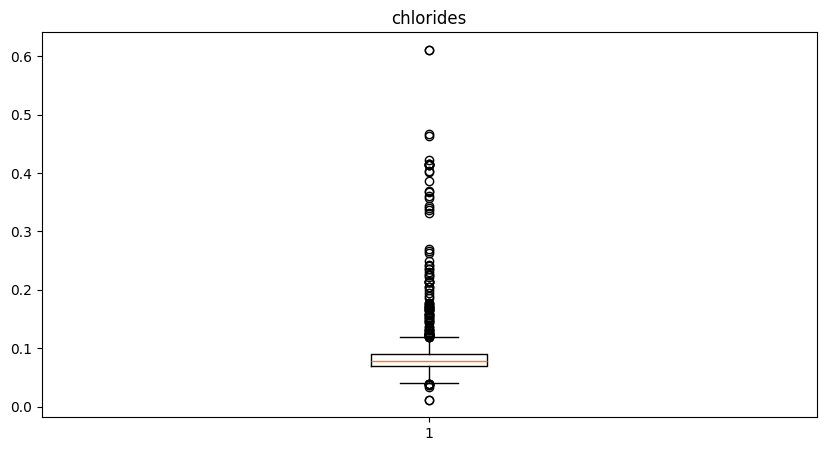

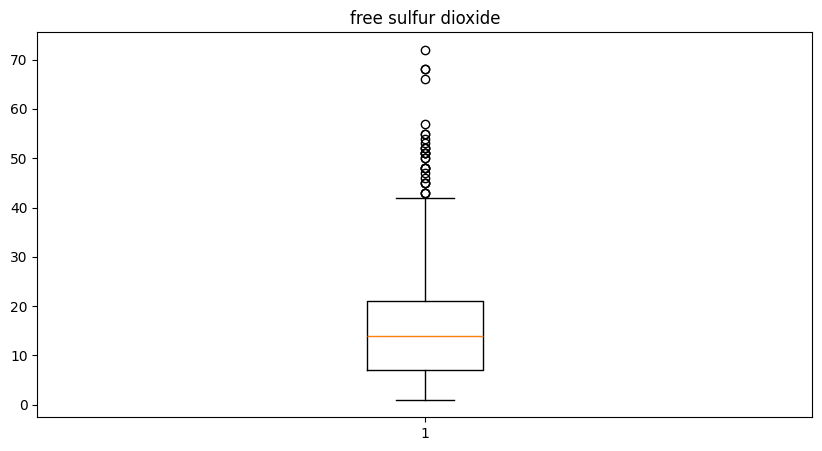

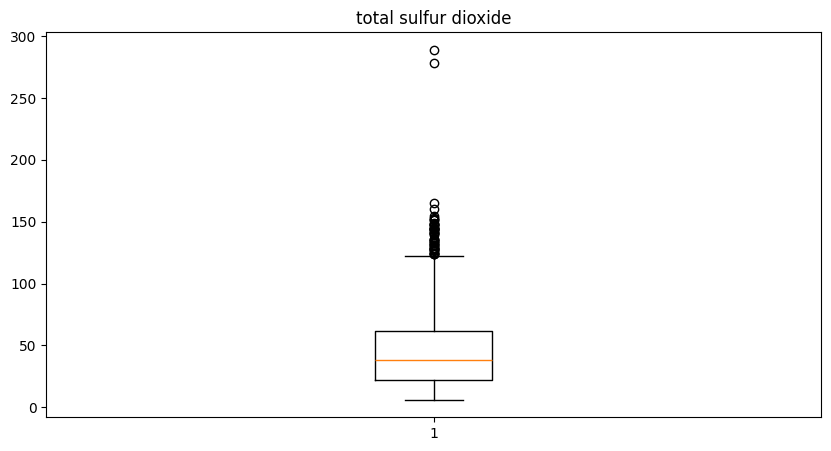

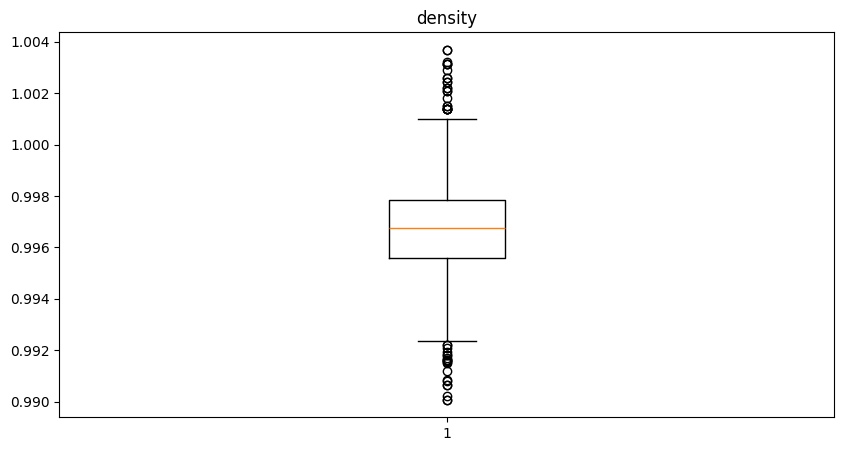

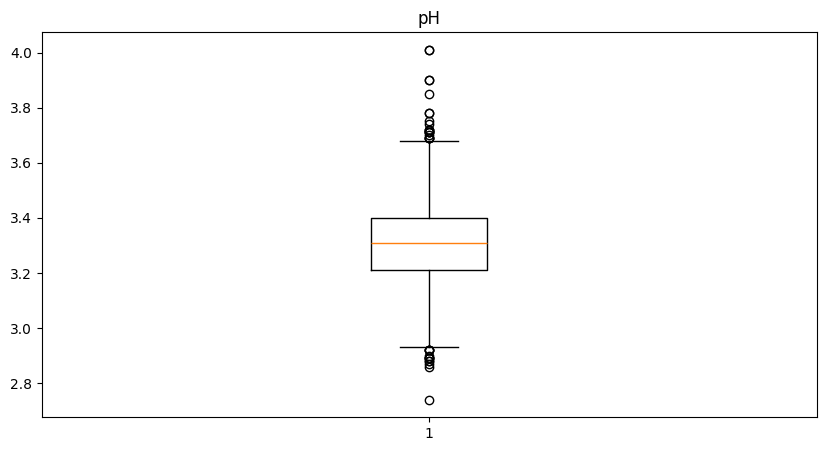

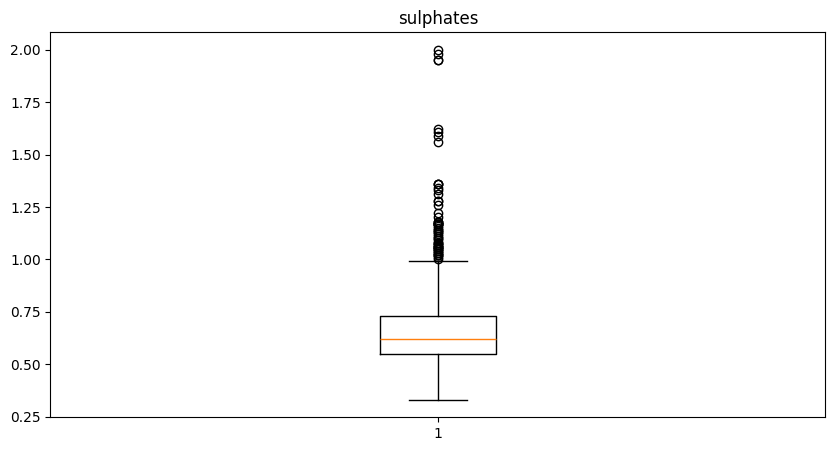

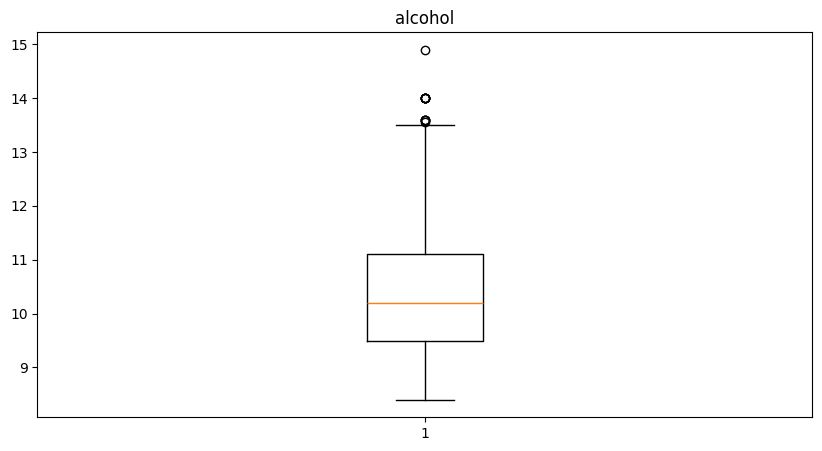

In [ ]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  plt.boxplot(wine_data[i])
  plt.title(i)

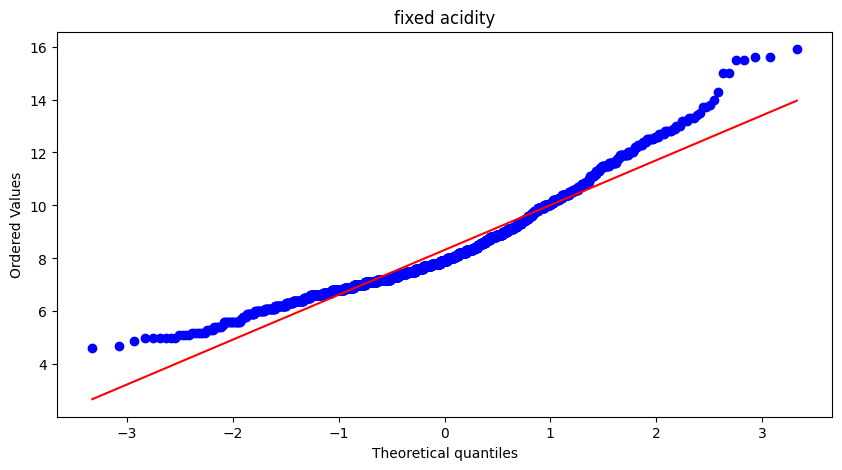

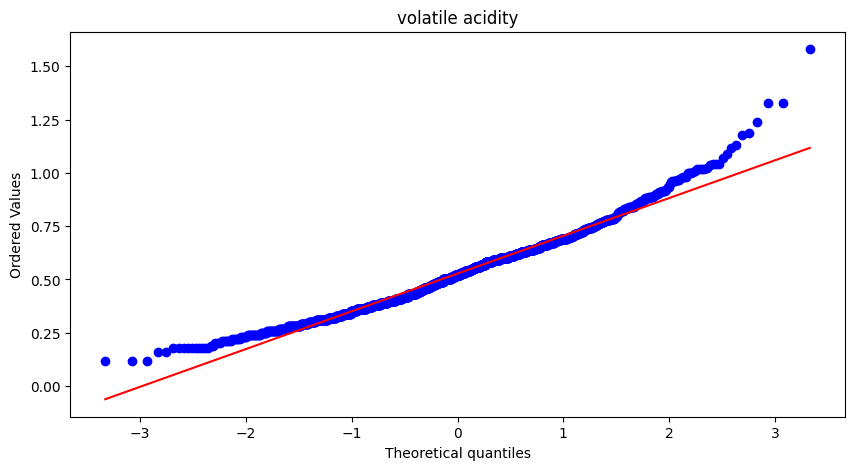

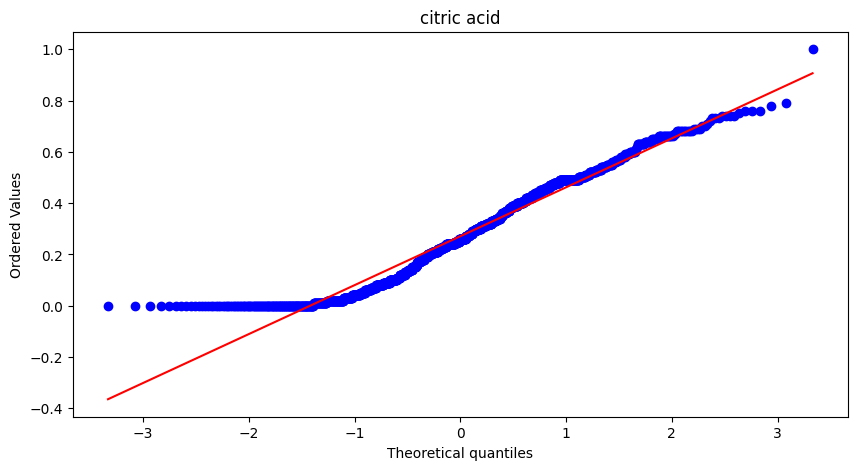

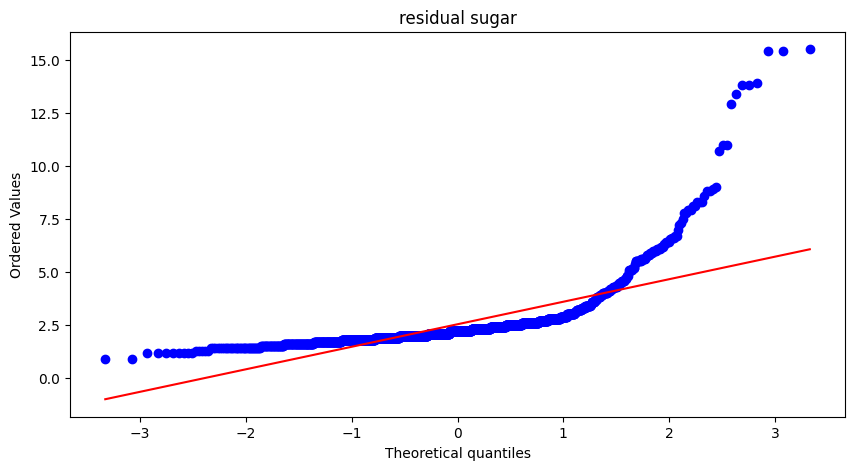

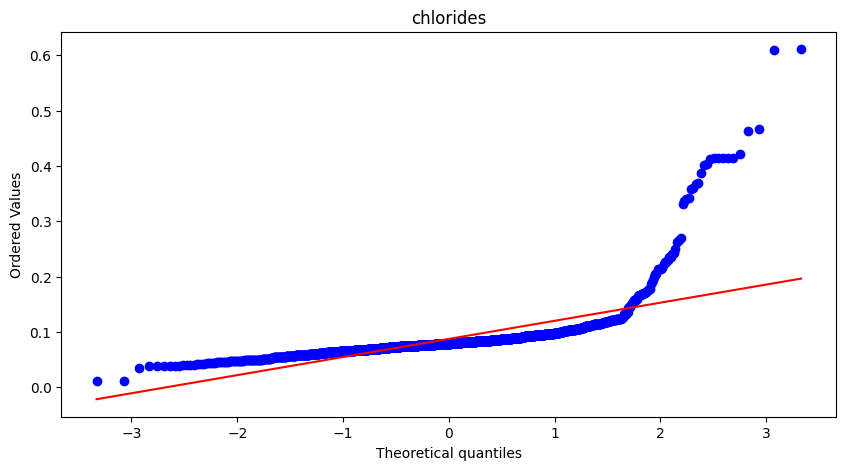

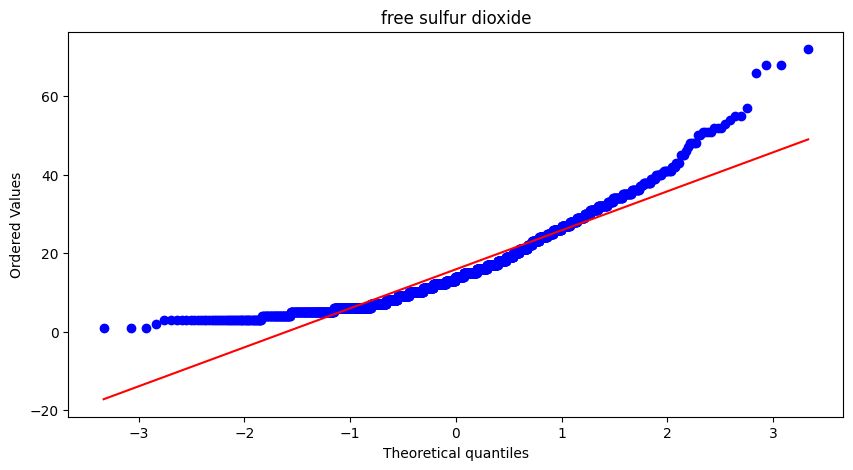

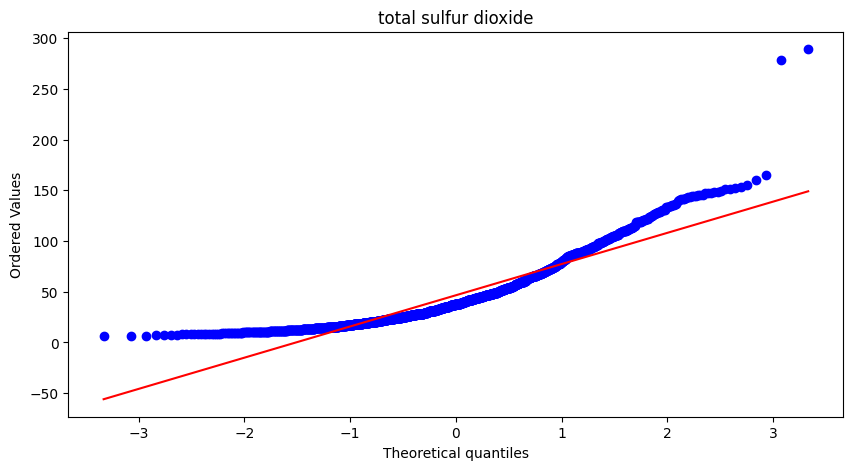

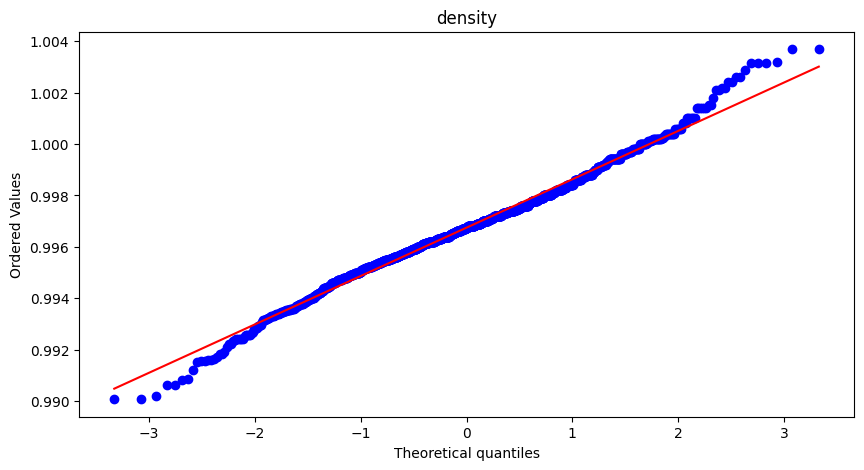

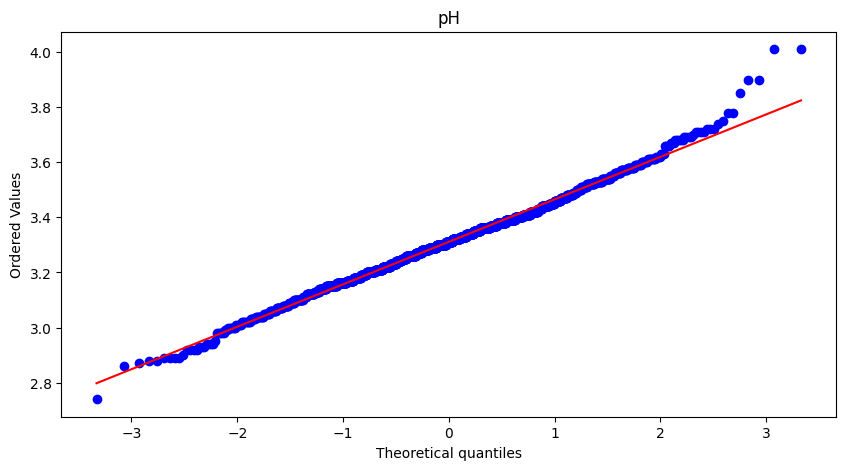

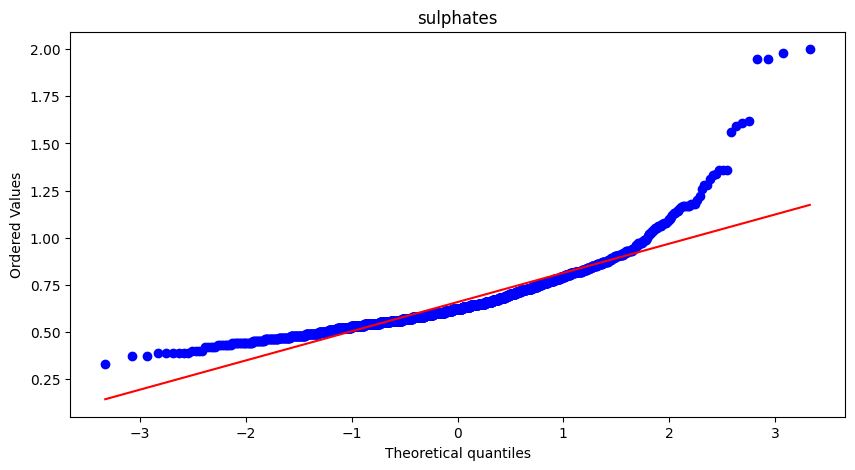

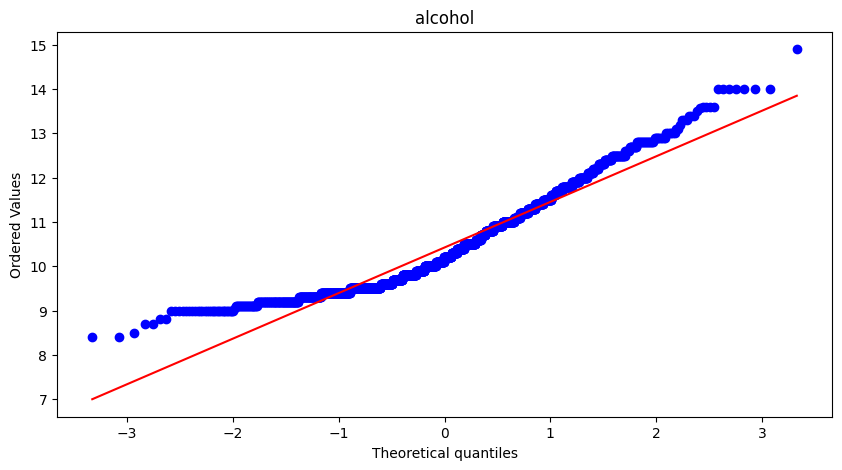

In [ ]:
from scipy.stats import probplot
for i in num_cols:
  plt.figure(figsize=(10,5))
  probplot(wine_data[i],plot=plt)
  plt.title(i)

In [ ]:
wine_corr = wine_data.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Handle Outliers**

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
#plt.boxplot(wine_data['fixed acidity'])

In [ ]:
#plt.boxplot(wine_data['fixed acidity'])

In [ ]:
wine_data['fixed acidity'] = winsorize(wine_data['fixed acidity'],limits=(.05,.0))

In [ ]:
#plt.boxplot(wine_data['fixed acidity'])

In [ ]:
#plt.boxplot(wine_data['volatile acidity'])

In [ ]:
wine_data['volatile acidity'] = winsorize(wine_data['volatile acidity'],limits=(.05,.0))

In [ ]:
#plt.boxplot(wine_data['volatile acidity'])

In [ ]:
#plt.boxplot(wine_data['citric acid'])

In [ ]:
wine_data['citric acid'] = winsorize(wine_data['citric acid'],limits=(.05,.0))

In [ ]:
#plt.boxplot(wine_data['citric acid'])

In [ ]:
#plt.boxplot(wine_data['residual sugar'])

In [ ]:
wine_data['residual sugar'] = winsorize(wine_data['residual sugar'],limits=(.25,.0))

In [ ]:
#plt.boxplot(wine_data['residual sugar'])

In [ ]:
#plt.boxplot(wine_data['chlorides'])

In [ ]:
wine_data['chlorides'] =  winsorize(wine_data['chlorides'],limits=(.20,.10))

In [ ]:
#plt.boxplot(wine_data['chlorides'])

In [ ]:
#plt.boxplot(wine_data['free sulfur dioxide'])

In [ ]:
wine_data['free sulfur dioxide'] = winsorize(wine_data['free sulfur dioxide'],limits=(.10,.0))

In [ ]:
#plt.boxplot(wine_data['free sulfur dioxide'])

In [ ]:
#plt.boxplot(wine_data['total sulfur dioxide'])

In [ ]:
wine_data['total sulfur dioxide'] = winsorize(wine_data['total sulfur dioxide'],limits=(.05,.0))

In [ ]:
#plt.boxplot(wine_data['total sulfur dioxide'])

In [ ]:
#plt.boxplot(wine_data['density'])

In [ ]:
wine_data['density'] = winsorize(wine_data['density'],limits=(.10,.10))

In [ ]:
#plt.boxplot(wine_data['density'])

In [ ]:
#plt.boxplot(wine_data['density'])

In [ ]:
wine_data['pH'] = winsorize(wine_data['pH'],limits=(.20,.10))

In [ ]:
#plt.boxplot(wine_data['density'])

In [ ]:
#plt.boxplot(wine_data['sulphates'])

In [ ]:
wine_data['sulphates'] = winsorize(wine_data['sulphates'],limits=(.25,.0))

In [ ]:
#plt.boxplot(wine_data['sulphates'])

In [ ]:
#plt.boxplot(wine_data['alcohol'])

In [ ]:
wine_data['alcohol'] = winsorize(wine_data['alcohol'],limits=(.10,.0))

In [ ]:
#plt.boxplot(wine_data['alcohol'])

In [ ]:
#plt.boxplot(wine_data['quality'])

In [ ]:
wine_data['quality'] = winsorize(wine_data['quality'],limits=(.05,.05))

In [ ]:
#plt.boxplot(wine_data['quality'])

**Scaling **

In [ ]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.18,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,6.1,0.550,0.10,2.2,0.067,39.0,51.0,0.99512,3.51,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,6.1,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.51,0.71,10.2,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minmax_scale = MinMaxScaler()
std_scale = StandardScaler()

In [ ]:
from scipy.stats import skew

In [ ]:
skewness=wine_data['fixed acidity'].skew
skewness()

np.float64(1.1108245064682614)

In [ ]:
wine_data['fixed acidity'] = minmax_scale.fit_transform(wine_data[['fixed acidity']])

In [ ]:
skewness = wine_data['residual sugar'].skew
skewness()

np.float64(4.797971872293276)

In [ ]:
wine_data['residual sugar'] = minmax_scale.fit_transform(wine_data[['residual sugar']])

In [ ]:
skewness = wine_data['free sulfur dioxide'].skew
skewness()

np.float64(1.2995815501644998)

In [ ]:
wine_data['free sulfur dioxide'] = minmax_scale.fit_transform(wine_data[['free sulfur dioxide']])

In [ ]:
skewness=wine_data['total sulfur dioxide'].skew
skewness()

np.float64(1.5299449757732773)

In [ ]:
wine_data['total sulfur dioxide']= minmax_scale.fit_transform(wine_data[['total sulfur dioxide']])

In [ ]:
skewness = wine_data['pH'].skew
skewness()

np.float64(0.29145807671453994)

In [ ]:
wine_data['pH'] = std_scale.fit_transform(wine_data[['pH']])

In [ ]:
skewness=wine_data['alcohol'].skew
skewness()

np.float64(0.9342667224753081)

In [ ]:
wine_data['alcohol'] = minmax_scale.fit_transform(wine_data[['alcohol']])

In [ ]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.132653,0.700,0.00,0.000000,0.076,0.089552,0.082734,0.99780,1.720698,0.56,0.017857,5
1,0.173469,0.880,0.00,0.051471,0.098,0.298507,0.201439,0.99680,-1.065845,0.68,0.089286,5
2,0.173469,0.760,0.04,0.029412,0.092,0.149254,0.154676,0.99700,-0.526514,0.65,0.089286,5
3,0.520408,0.280,0.56,0.000000,0.075,0.179104,0.176259,0.99800,-1.245622,0.58,0.089286,6
4,0.132653,0.700,0.00,0.000000,0.076,0.089552,0.082734,0.99780,1.720698,0.56,0.017857,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.010204,0.600,0.08,0.007353,0.090,0.402985,0.118705,0.99490,1.181368,0.58,0.214286,5
1595,0.000000,0.550,0.10,0.022059,0.067,0.507463,0.143885,0.99512,1.720698,0.76,0.339286,6
1596,0.020408,0.510,0.13,0.029412,0.076,0.358209,0.104317,0.99574,0.911702,0.75,0.303571,6
1597,0.000000,0.645,0.12,0.007353,0.075,0.402985,0.118705,0.99547,1.720698,0.71,0.160714,5


**Model Fitting**

In [ ]:
x = wine_data.drop('quality',axis=1)
y = wine_data['quality']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
logir = LogisticRegression()
logir.fit(x_train,y_train)
predict_r = logir.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score
print("Accuracy is",accuracy_score(y_test,predict_r))
print("Precision is",precision_score(y_test,predict_r,average='weighted'))
print("Recall is",recall_score(y_test,predict_r,average='weighted'))
print("f1 is",f1_score(y_test,predict_r,average='weighted'))

Accuracy is 0.603125
Precision is 0.587018453663793
Recall is 0.603125
f1 is 0.5813415750915751


In [ ]:
confusion_matrix(y_test,predict_r)

array([[115,  24,   2],
       [ 56,  69,   7],
       [  3,  35,   9]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,50)

In [ ]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  pred_r = classifier.predict(x_test)
  accu = accuracy_score(y_test,pred_r)
  metric_k.append(accu)

In [ ]:
confusion_matrix(y_test,pred_r)

array([[112,  29,   0],
       [ 55,  75,   2],
       [  1,  40,   6]])

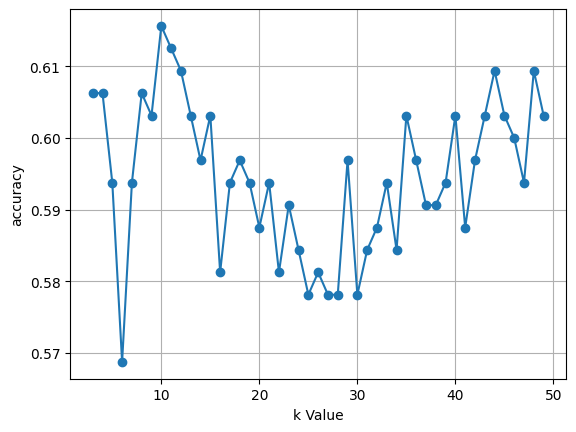

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
pred_r = classifier.predict(x_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test,pred_r))
print("Precision is",precision_score(y_test,pred_r,average='weighted'))
print("Recall is",recall_score(y_test,pred_r,average='weighted'))
print("f1 is",f1_score(y_test,pred_r,average='weighted'))

Accuracy is 0.615625
Precision is 0.6118194782630082
Recall is 0.615625
f1 is 0.6062134100713091
